In [1]:
from numpy import *
import os
import matplotlib.pyplot as plt
import astropy
import pandas as pd
from astropy.io import fits
from astropy.table import Table
from astropy.visualization import astropy_mpl_style
from astropy.utils.data import get_pkg_data_filename
from astropy.table import QTable
import numpy as np
import astropy.units as u
from astropy.coordinates import SkyCoord
from astropy.cosmology import Planck15
plt.style.use(astropy_mpl_style)

import numpy as np
from numpy import *
from numpy import nan
import os
import matplotlib.pyplot as plt
import astropy
import pandas as pd
from astropy.io import fits
from astropy.table import Table
from astropy.visualization import astropy_mpl_style
from astropy.utils.data import get_pkg_data_filename
import matplotlib as mpl
from matplotlib import pyplot as plt
from astropy.cosmology import WMAP9 as cosmo
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import (inset_axes, InsetPosition,
                                                  mark_inset)

In [2]:
path = os.path.expanduser('~/Desktop/Data/')
os.path.exists(path)

True

In [35]:
#For .cat file use the following. The format given was arbitrary so it wouldn't complain
# file = Table.read(os.path.expanduser('~/Desktop/Data/cdfs-catalogs/cdfs/cdfs.v1.6.9.3dhst.v0.4.cat'), format = 'ascii')
# Table(file)
stuff

,id,redshift
0,20366,3.531
2,11462,3.810
3,12533,3.545
4,12552,3.195
5,12903,3.097
...,...,...
97,23511,3.444
98,24259,3.509
99,26616,3.521
100,27445,2.615


In [38]:
comp_ew = Table.read(os.path.expanduser(path+'/EELG-stuff/comp_ew.dat'), format ='ascii')
xy = comp_ew.to_pandas()
pd.set_option('display.max_rows', 20)
# xy
xyz = xy[xy['col1']<100000]
stuff = xyz.drop(['col3','col4'],axis=1)
stuff.rename(columns={'col1':'id' ,'col2':'redshift'} ,inplace=True)
stuff
eelgs=pd.merge(Cabbage,stuff,left_on=Cabbage['id'],right_on=stuff['id'])
eelgs[eelgs['id_x']==20366]

,key_0,id_x,redshift_x,ra,dec,Ksall,Ksall*,B,B*,I,...,IRAC_36,IRAC_36*,IRAC_45,IRAC_45*,IRAC_58,IRAC_58*,IRAC_80,IRAC_80*,id_y,redshift_y
42,20366,20366,3.53172,53.098751,-27.76479,1.340433,0.078106,0.072954,0.045559,0.415332,...,0.411213,0.068629,0.607132,0.075825,0.86682,0.739835,0.715866,0.806867,20366,3.531


In [3]:
mosel = Table.read(os.path.expanduser(path+'full_mosel_sample.dat'), format = 'ascii')
mosel2 = mosel[mosel['field'] != 'UDS']
mosel3 = mosel2[mosel2['field'] != 'COSMOS']
mosel3=mosel3.to_pandas()
mosel3=mosel3.drop('field',axis=1)
# mosel3

v2 = Table.read(os.path.expanduser(path+'cdfs-catalogs/cdfs/eazy/cdfs.v1.6.9.153.rf'), format ='ascii')
dfuq = v2.to_pandas()
Nick = dfuq.drop(['DM','nfilt_fit','chi2_fit','L153','p16','p84','p025','p975'],axis=1)
# Nick

#mosel spectroscopic redshifts
Nick.loc[Nick.id == 10936, 'z'] = mosel3['zspec'].iloc[0]
Nick.loc[Nick.id == 11999, 'z'] = mosel3['zspec'].iloc[1]
Nick.loc[Nick.id == 12533, 'z'] = mosel3['zspec'].iloc[2]
Nick.loc[Nick.id == 13155, 'z'] = mosel3['zspec'].iloc[3]
Nick.loc[Nick.id == 13203, 'z'] = mosel3['zspec'].iloc[4]
Nick.loc[Nick.id == 15111, 'z'] = mosel3['zspec'].iloc[5]
Nick.loc[Nick.id == 15992, 'z'] = mosel3['zspec'].iloc[6]
Nick.loc[Nick.id == 18742, 'z'] = mosel3['zspec'].iloc[7]
Nick.loc[Nick.id == 19843, 'z'] = mosel3['zspec'].iloc[8]
Nick.loc[Nick.id == 21896, 'z'] = mosel3['zspec'].iloc[9]
Nick.loc[Nick.id == 22136, 'z'] = mosel3['zspec'].iloc[10]
Nick.loc[Nick.id == 22731, 'z'] = mosel3['zspec'].iloc[11]
Nick.loc[Nick.id == 22839, 'z'] = mosel3['zspec'].iloc[12]
Nick.loc[Nick.id == 15782, 'z'] = mosel3['zspec'].iloc[13]
Nick.loc[Nick.id == 17189, 'z'] = mosel3['zspec'].iloc[14]
Nick.loc[Nick.id == 16872, 'z'] = mosel3['zspec'].iloc[15]
Nick.loc[Nick.id == 14864, 'z'] = mosel3['zspec'].iloc[16]
Nick.loc[Nick.id == 15561, 'z'] = mosel3['zspec'].iloc[17]
# Nick
# Nick[Nick['id']==6019]

In [4]:
# pd.set_option('display.max_rows', None)
v1 = Table.read(os.path.expanduser(path+'cdfs-catalogs/cdfs/cdfs.v1.6.11.cat'), format ='ascii')
# Table(v1)[15110]
v3=v1.to_pandas()
# v3.to_csv('cdfs.v1.6.11.csv')


In [5]:
df = v1.to_pandas()
# df = df.loc[df['z_spec'] != -99] #Remove items from catalogue that do not have redshift value (Find out wheret to get these later)
# df=df.loc[df['star'] !=1]
df=df.loc[df['snr'] >20]
# df=df.loc[df['snr'] <20]
# df=df.loc[df['nearstar'] !=1]
df=df.loc[df['use'] ==1]
Cabbage = df.drop(['x','y','SEflags','iso_area','fap_Ksall','eap_Ksall',
                         'apcorr','Ks_ratio','fapcirc07_Ksall','eapcirc07_Ksall','apcorr07',
                         'fcirc07_Ksall','ecirc07_Ksall','fauto_Ksall','flux50_radius',
                         'a_vector','b_vector','kron_radius','w_Ksall','w_B','w_I','w_R',
                         'w_U','w_V','w_Z','w_Hs','w_J1','w_J2','w_J3','w_Ks','w_KsHI',
                         'w_NB118','w_NB209','w_F098M','w_F105W','w_F125W','w_F140W','w_F160W',
                         'w_F814W','w_IA484','w_IA527','w_IA574','w_IA598','w_IA624','w_IA651',
                         'w_IA679','w_IA738','w_IA767','w_IA797','w_IA856','w_WFI_V','w_WFI_Rc',
                         'w_WFI_U38','w_tenisK','w_IRAC_36','w_IRAC_45','w_IRAC_58','w_IRAC_80',
                         'wmin_optical','wmin_hst_optical','wmin_fs','wmin_jhk','wmin_hst',
                         'wmin_irac','wmin_all','star','use','nearstar','snr','use_nosnr','z_spec','w_Hl'],axis=1)
# df
# alldf
Cabbage.columns = [x + '*' if x.startswith('e_') else x for x in Cabbage.columns]
Cabbage.columns = Cabbage.columns.str.replace('f_','')
Cabbage.columns = Cabbage.columns.str.replace('e_','')
# Cabbage.iloc[:,1:-1] = Cabbage.iloc[:,1:-1].mul(10**-6)
# Cabbage = Cabbage.loc[:, Cabbage.columns != 'id'].mul(0.3631*10**-6)
# Cabbage = Cabbage.loc[:, Cabbage.columns != 'id'].mul(10**-6)
# Cabbage.iloc[:,1:-1] = Cabbage.iloc[:,1:-1].mul(0.3631*10**-6)
Cabbage

,id,ra,dec,Ksall,Ksall*,B,B*,I,I*,R,...,tenisK,tenisK*,IRAC_36,IRAC_36*,IRAC_45,IRAC_45*,IRAC_58,IRAC_58*,IRAC_80,IRAC_80*
5859,5860,53.060615,-27.882338,19.414863,0.283634,0.829864,0.059702,1.791655,0.084924,1.438731,...,20.572091,0.313600,33.546430,0.085948,41.357981,0.119375,47.631865,0.850779,50.199285,1.049104
5863,5864,53.062992,-27.883194,19.603220,0.221311,0.010763,0.044224,0.789242,0.077073,0.298261,...,19.985491,0.280869,34.668249,0.082916,39.896684,0.112784,30.601318,0.846585,20.615799,1.020953
5879,5880,53.060547,-27.883299,7.387473,0.251747,1.181943,0.061196,1.588666,0.094498,1.175208,...,7.873107,0.314152,11.510902,0.085797,13.685031,0.119893,11.360159,0.857931,9.694611,1.046614
5885,5886,53.061234,-27.882744,9.428200,0.293284,2.611979,0.063674,3.958187,0.110827,2.781134,...,9.514337,0.405381,10.977134,0.094581,8.903584,0.131440,7.477666,0.979424,3.420668,1.148579
5927,5928,53.063004,-27.883558,5.946510,0.166310,0.116393,0.035993,1.227649,0.063376,0.602921,...,5.757964,0.228615,6.678411,0.098757,5.848712,0.136431,1.881656,1.006612,-0.121929,1.165247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30727,30728,53.145035,-27.656689,20.138108,0.651412,0.081377,0.057738,1.849849,0.098152,0.726967,...,20.310914,0.422386,35.177332,0.156907,29.791474,0.169845,22.140839,1.329149,22.983225,1.200962
30733,30734,53.160778,-27.662760,9.649412,0.346174,2.204990,0.055503,3.248687,0.092293,2.740754,...,11.507793,0.367369,12.204492,0.111465,13.127363,0.133399,11.963370,0.952573,9.041841,0.960242
30780,30781,53.158829,-27.662449,123.874112,0.435724,49.277309,0.046354,59.354916,0.077713,80.538873,...,119.633205,0.313649,224.001365,0.112189,268.728505,0.131015,335.668261,0.939104,402.754324,0.949126
30809,30810,53.163620,-27.665506,12.387311,0.367922,2.748427,0.065170,3.774179,0.108733,3.187648,...,13.167675,0.426581,15.357295,0.115978,15.260206,0.138435,11.921391,0.977595,8.942495,1.007640


In [7]:
peanutbutter=Nick.loc[Nick['z'] != -99]
ID =Nick['id']
# Cabbage.insert(0,"id",ID)
Cabbage.insert(1,"redshift",peanutbutter['z'])
Cabbage

,id,redshift,ra,dec,Ksall,Ksall*,B,B*,I,I*,...,tenisK,tenisK*,IRAC_36,IRAC_36*,IRAC_45,IRAC_45*,IRAC_58,IRAC_58*,IRAC_80,IRAC_80*
5859,5860,2.21767,53.060615,-27.882338,19.414863,0.283634,0.829864,0.059702,1.791655,0.084924,...,20.572091,0.313600,33.546430,0.085948,41.357981,0.119375,47.631865,0.850779,50.199285,1.049104
5863,5864,1.80828,53.062992,-27.883194,19.603220,0.221311,0.010763,0.044224,0.789242,0.077073,...,19.985491,0.280869,34.668249,0.082916,39.896684,0.112784,30.601318,0.846585,20.615799,1.020953
5879,5880,1.83162,53.060547,-27.883299,7.387473,0.251747,1.181943,0.061196,1.588666,0.094498,...,7.873107,0.314152,11.510902,0.085797,13.685031,0.119893,11.360159,0.857931,9.694611,1.046614
5885,5886,1.10100,53.061234,-27.882744,9.428200,0.293284,2.611979,0.063674,3.958187,0.110827,...,9.514337,0.405381,10.977134,0.094581,8.903584,0.131440,7.477666,0.979424,3.420668,1.148579
5927,5928,0.71540,53.063004,-27.883558,5.946510,0.166310,0.116393,0.035993,1.227649,0.063376,...,5.757964,0.228615,6.678411,0.098757,5.848712,0.136431,1.881656,1.006612,-0.121929,1.165247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30727,30728,1.01495,53.145035,-27.656689,20.138108,0.651412,0.081377,0.057738,1.849849,0.098152,...,20.310914,0.422386,35.177332,0.156907,29.791474,0.169845,22.140839,1.329149,22.983225,1.200962
30733,30734,1.61784,53.160778,-27.662760,9.649412,0.346174,2.204990,0.055503,3.248687,0.092293,...,11.507793,0.367369,12.204492,0.111465,13.127363,0.133399,11.963370,0.952573,9.041841,0.960242
30780,30781,2.62456,53.158829,-27.662449,123.874112,0.435724,49.277309,0.046354,59.354916,0.077713,...,119.633205,0.313649,224.001365,0.112189,268.728505,0.131015,335.668261,0.939104,402.754324,0.949126
30809,30810,1.49907,53.163620,-27.665506,12.387311,0.367922,2.748427,0.065170,3.774179,0.108733,...,13.167675,0.426581,15.357295,0.115978,15.260206,0.138435,11.921391,0.977595,8.942495,1.007640


In [8]:
mask1=Cabbage['redshift']>2.5
mask2=Cabbage['redshift']<4
Anshu = Cabbage[mask1*mask2]
Anshu
# new_df = Anshu[['ra', 'dec']]
# new_df.to_csv('radec_ZFOURGE.csv')

,id,redshift,ra,dec,Ksall,Ksall*,B,B*,I,I*,...,tenisK,tenisK*,IRAC_36,IRAC_36*,IRAC_45,IRAC_45*,IRAC_58,IRAC_58*,IRAC_80,IRAC_80*
6019,6020,2.50071,53.069767,-27.880484,19.515433,0.309626,0.161915,0.057989,0.544843,0.099184,...,20.884035,0.362310,35.677971,0.093161,41.646591,0.130856,45.102755,0.859160,31.144714,1.005342
6234,6235,2.77694,53.072689,-27.880621,3.306707,0.149617,0.171211,0.036225,0.702190,0.062183,...,3.596647,0.227361,5.943287,0.113991,8.722406,0.158060,3.350872,1.061496,7.259040,1.199949
6328,6329,2.55376,53.068493,-27.879311,3.654264,0.174830,0.115806,0.050681,0.423332,0.098558,...,3.801029,0.321017,6.779083,0.104143,7.157794,0.150172,9.480485,0.991728,6.979234,1.166259
6464,6465,2.80100,53.076000,-27.878149,4.656314,0.143286,1.901193,0.045614,2.182614,0.074652,...,5.058386,0.271738,7.661615,0.077210,8.641480,0.103059,11.353160,0.697379,10.830343,0.827297
6524,6525,2.87872,53.084026,-27.876560,4.861317,0.215513,0.172211,0.059918,0.941691,0.100119,...,4.623141,0.360687,9.475031,0.080601,11.567044,0.111067,12.246585,0.797210,14.440486,0.957614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30248,30249,2.50950,53.129868,-27.668760,4.869137,0.294931,1.271703,0.047360,1.846094,0.081724,...,5.434245,0.347097,6.112457,0.105070,6.119196,0.118810,5.936292,0.887969,2.747585,0.884290
30396,30397,3.51017,53.165634,-27.665751,3.390869,0.213782,0.478612,0.047956,1.378903,0.081330,...,3.492532,0.315148,0.995246,0.099365,1.180066,0.121220,1.339153,0.867953,1.555646,0.938688
30464,30465,3.49404,53.125198,-27.662697,4.960675,0.307796,0.226110,0.047588,1.266576,0.082321,...,5.373849,0.363440,6.263159,0.132452,7.142795,0.152708,7.252393,1.127851,9.555392,1.071211
30689,30690,2.67692,53.126308,-27.665636,8.520424,0.372730,8.560682,0.047548,8.922524,0.082516,...,9.077534,0.358498,8.139788,0.204694,6.021505,0.246122,4.960383,1.627329,4.424089,1.701246


In [9]:
file2 = fits.open(os.path.expanduser('~/Desktop/Data/JWST/JADES_phot.fits'))
df = Table(file2[7].data).to_pandas()
df2 = Table(file2[9].data).to_pandas()
mask = np.isnan(df2['z_spec'])
mask1 = df2['EAZY_z_a']>5.5
cosmo = Planck15
age_of_universe025 = cosmo.age(df2['EAZY_l95'])
age_of_universe975 = cosmo.age(df2['EAZY_u95'])
age_of_universe025.to(u.Gyr).value-age_of_universe975.to(u.Gyr).value
mask2 = age_of_universe025.to(u.Gyr).value-age_of_universe975.to(u.Gyr).value <0.2
mask3 = df2['EAZY_chisq_min']<50
mask4=df2['z_spec']>5.5
specs = df[mask4]
specs

/home/magnus/notebook/jupyterenv/lib/python3.8/site-packages/astropy/cosmology/flrw/base.py:1000: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  return quad(self._lookback_time_integrand_scalar, z, inf)[0]
/home/magnus/notebook/jupyterenv/lib/python3.8/site-packages/numpy/lib/function_base.py:2387: RuntimeWarning: invalid value encountered in _integral_age (vectorized)
  outputs = ufunc(*inputs)


,ID,RA,DEC,F090W_KRON,F090W_KRON_S,F090W_SEG,F115W_KRON,F115W_KRON_S,F115W_SEG,F150W_KRON,...,F105W_SEG_e,F125W_KRON_e,F125W_KRON_S_e,F125W_SEG_e,F140W_KRON_e,F140W_KRON_S_e,F140W_SEG_e,F160W_KRON_e,F160W_KRON_S_e,F160W_SEG_e
38,77910,53.170533,-27.844221,11.019117,7.594368,10.567319,21.726032,15.306145,20.247856,24.666958,...,6.313741,13.902647,3.696241,9.125811,38.925720,-11.180047,26.455130,19.182119,4.795823,12.439235
457,84518,53.156245,-27.836168,36.311790,24.115685,31.975311,31.822880,23.855753,30.686316,25.325222,...,7.526712,14.375845,3.932418,9.415924,43.312256,12.678237,29.238880,15.217882,4.291457,10.138142
1029,88612,53.162447,-27.830573,9.741658,6.586522,7.778915,12.906807,8.891262,13.155581,18.347233,...,3.431756,9.266095,4.747244,7.402720,32.666229,-17.602255,26.577538,10.415653,5.401327,8.440164
1348,90354,53.133825,-27.828256,-1.980610,0.215238,-0.682863,4.083546,1.772306,3.488077,4.279435,...,3.277902,7.147312,3.123187,4.255946,21.638653,-15.875474,13.866310,9.487884,6.054783,5.822556
2223,94574,53.145718,-27.823239,15.575994,12.412144,15.857346,16.642136,13.426759,16.428587,11.153740,...,4.388107,8.414614,4.183226,5.683217,24.599861,12.932322,17.169113,10.846762,5.106201,7.383717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33589,219026,53.153142,-27.737165,31.121862,16.298244,31.025713,34.882343,20.578922,35.756687,34.594749,...,12.268601,20.873934,5.531721,19.824642,41.272903,12.238785,39.418659,29.889929,7.580659,28.359913
33594,219038,53.155349,-27.737533,15.265102,9.726532,15.260103,18.561775,10.750498,19.528845,14.502880,...,7.097908,18.402386,8.834469,16.120268,29.604731,16.700489,26.501064,22.751341,10.493777,19.964628
33603,219057,53.168691,-27.737203,9.465716,3.369106,7.000754,25.979345,20.279381,24.547699,29.425873,...,8.427357,14.936579,4.149093,11.542845,42.962669,13.088329,33.945740,16.718210,4.681586,12.991612
33650,219195,53.167816,-27.736142,1.130055,-0.004021,0.747477,25.219007,13.872597,25.909267,28.647432,...,7.657782,10.653324,5.347673,9.470889,28.325138,15.946582,25.466337,15.891616,7.603057,14.146850


In [10]:
file2 = fits.open(os.path.expanduser('~/Desktop/Data/JWST/ceers-grizli-v4.0-fix.eazypy.zout.fits'))#, encoding='latin-1',on_bad_lines='skip',lineterminator='\n')
x=Table(file2[1].data)
# mask1=x['z_phot']<9.99
mask2=x['z_phot']>5.5
mask3=x['z_phot']<14
m = x[mask2*mask3]
cosmo = Planck15
age_of_universe025 = cosmo.age(m['z025'])
age_of_universe975 = cosmo.age(m['z975'])
age_of_universe025.to(u.Gyr).value-age_of_universe975.to(u.Gyr).value
mask_zphot = age_of_universe025.to(u.Gyr).value-age_of_universe975.to(u.Gyr).value <0.2
# mask_zphot2 = age_of_universe025.to(u.Gyr).value-age_of_universe975.to(u.Gyr).value >0
m=m[mask_zphot]
m

id,ra,dec,z_spec,nusefilt,z_ml,z_ml_chi2,z_ml_risk,lc_min,lc_max,z_phot,z_phot_chi2,z_phot_risk,z_min_risk,min_risk,z_raw_chi2,raw_chi2,z025,z160,z500,z840,z975,restU,restU_err,restB,restB_err,restV,restV_err,restJ,restJ_err,dL,mass,sfr,Lv,LIR,energy_abs,Lu,Lj,L1400,L2800,LHa,LOIII,LHb,LOII,MLv,Av,lwAgeV,mass_p,sfr_p,Lv_p,LIR_p,energy_abs_p,Lu_p,Lj_p,L1400_p,L2800_p,LHa_p,LOIII_p,LHb_p,LOII_p,Av_p,ssfr_p,rest120,rest120_err,rest121,rest121_err,rest156,rest156_err,rest157,rest157_err,rest158,rest158_err,rest159,rest159_err,rest160,rest160_err,rest414,rest414_err,rest415,rest415_err,rest416,rest416_err
int32,float64,float64,float64,int64,float32,float32,float32,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64[5],float64[5],float64[5],float64[5],float64[5],float64[5],float64[5],float64[5],float64[5],float64[5],float64[5],float64[5],float64[5],float64[5],float64[5],float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
87,214.95310874435216,52.91582815103618,-1.0,9,5.873685,5.4353366,0.021945685,4318.828102108889,44036.71097714713,5.873685,5.4353366,0.021945685,5.8891683,0.02248883,5.8891683,5.443584,5.541702,5.7158346,5.869205,6.015476,6.167742,0.056333654,0.0034959204,0.06543481,0.005729098,0.06438641,0.0048281252,0.037478108,0.027555708,56296.40833767539,586603237.922734,1.779723859369417,4938850073.469025,3922738743.813011,3922738743.813011,6936169162.779417,1570396672.1348472,23124460916.40615,8252280162.053684,254335286.33421087,426822084.5742708,87858380.24133466,77136791.0436235,0.11877324259626831,0.2730940436876742,0.03483630585053869,156236742.9622572 .. 1320829945.5181515,1.5781397429071662 .. 1.9382657244564587,4523792052.535236 .. 5461205227.542584,1498295980.247072 .. 8082256968.918891,1498295980.247072 .. 8082256968.918891,6164357844.851162 .. 7541804521.697194,1150635987.8468158 .. 2324366961.4648147,20287723512.646355 .. 25386010439.56268,7270433577.666727 .. 9030805961.811314,223082680.1306819 .. 279258311.03015715,374372622.45578635 .. 468649215.565152,77061893.70592842 .. 96468325.14867477,67657785.75083265 .. 84696081.43086755,0.017421044505293668 .. 0.5907692610479346,1.2617270454408382e-09 .. 1.1617905429885162e-08,0.07602108,0.006968621,0.060488917,0.00355299,0.053998366,0.0036239568,0.07658716,0.0067344457,0.07078313,0.004819311,0.044779804,0.010213351,0.042818036,0.015645241,0.051724285,0.0029947404,0.056275938,0.0044630542,0.04529391,0.010571374
282,214.9386310805627,52.9117477117697,-1.0,9,8.91449,9.598735,0.08748163,4318.828102108889,44036.71097714713,8.91449,9.598735,0.08748163,8.874447,0.08805302,8.874447,9.630655,7.8159213,8.496439,8.934882,9.397308,9.972472,0.078858174,0.0074365065,0.11202227,0.0072382167,0.12516063,0.1381057,0.102096446,0.61374635,91063.17744423059,5891764541.559573,4.163607444445859,17786358353.90334,36684372729.51916,36684372729.51916,16800912664.108673,9833869479.279514,44096453957.55318,17558864721.83769,490633435.9299091,720521480.9303802,169790130.08824927,115038192.49100189,0.3312518742919955,0.6901430763773267,0.1252754988487401,3761331492.2785344 .. 8290157715.1550455,3.703706851725281 .. 4.534073379124963,14529164695.07477 .. 20947855432.761196,23431788890.85762 .. 51602341121.800835,23431788890.85762 .. 51602341121.800835,15030766512.511986 .. 18278811187.55906,6967958363.308348 .. 12956348563.486147,38207197378.88355 .. 49276296012.94246,15887742238.997515 .. 19179269989.24742,422212302.32282233 .. 551221690.4791864,620041201.1961601 .. 809498761.9617535,146108439.9845147 .. 190761226.01911122,98995298.12506282 .. 129244527.56203768,0.5498808630050267 .. 0.7970222624002394,5.19335217269781e-10 .. 1.

In [65]:
recurve = Table.read(os.path.expanduser('~/Documents/MT2MT2/files/observations.dat'),format='ascii')
recurve=recurve.to_pandas()
file = fits.open(os.path.expanduser('~/Desktop/Data/JWST/ceers-grizli-v4.0-fix_phot_apcorr.fits'))#, encoding='latin-1',on_bad_lines='skip',lineterminator='\n')


y=Table(file[1].data)
z=y[mask2]
# z=z[mask_zphot]
z=m
index_column = range(1, len(z) + 1)
z.add_column(QTable.Column(index_column, name='index'), index=0)
id_values = z['id']
unique_values, counts = np.unique(id_values, return_counts=True)
duplicated_values = unique_values[counts > 1]
# z
ace = m.to_pandas()
mt=pd.merge(ace,recurve,left_on=ace['id'],right_on=recurve['id'])

ValueError: Cannot replace column 'index'.  Use Table.replace_column() instead.

In [62]:
mt['ra']

0     214.939108
1     214.907287
2     214.942095
3     214.892699
4     214.941027
5     214.886602
6     214.942419
7     214.891778
8     215.018306
9     214.835851
10    214.935748
11    214.919041
12    214.949931
13    214.831790
Name: ra, dtype: float64

In [11]:
def FancyPlot(xlab='',ylab='',lw=2.5,lfs=45,tfs=25,size_x=13,size_y=12):
    plt.rcParams['axes.linewidth']=lw
    plt.rc('text',usetex=True)
    plt.rc('font',family='serif',size=tfs)
    mpl.rcParams['text.latex.preamble']=[r'\usepackage{mathpazo}']
    mpl.rcParams['mathtext.default'] = 'regular'
    fig = plt.figure(figsize=(size_x,size_y))
    ax=fig.add_subplot(111)
    ax.set_xlabel(xlab,fontsize=lfs)
    ax.set_ylabel(ylab,fontsize=lfs)
    ax.tick_params(which='major',direction='in',width=2,length=13,right=True,top=True,pad=7)
    ax.tick_params(which='minor',direction='in',width=1,length=10,right=True,top=True)
    ax.grid(False)
    return fig,ax
def HexPlot(xlab1='',ylab1='',xlab2='',ylab2='',xlab3='',ylab3='',\
           wspace=0.25,lw=2.5,lfs=45,tfs=25,size_x=20,size_y=7,Grid=False):
    plt.rcParams['axes.linewidth']=lw
    plt.rc('text',usetex=True)
    plt.rc('font',family='serif',size=tfs)
    mpl.rcParams['text.latex.preamble']=[r'\usepackage{mathpazo}']
    fig,axarr =plt.subplots(1,3,figsize=(size_x,size_y))
    gs=gridspec.GridSpec(1,3)
    gs.update(wspace=wspace)
    ax1=plt.subplot(gs[0])
    ax2=plt.subplot(gs[1])
    ax3=plt.subplot(gs[2])
    
    ax1.tick_params(which='major',direction='in',width=2,length=13,right=True,top=True,pad=7)
    ax1.tick_params(which='minor',direction='in',width=1,length=10,right=True,top=True)
    
    ax2.tick_params(which='major',direction='in',width=2,length=13,right=True,top=True,pad=7)
    ax2.tick_params(which='minor',direction='in',width=1,length=10,right=True,top=True)
    
    ax3.tick_params(which='major',direction='in',width=2,length=13,right=True,top=True,pad=7)
    ax3.tick_params(which='minor',direction='in',width=1,length=10,right=True,top=True)
    
    ax1.set_xlabel(xlab1,fontsize=lfs)
    ax1.set_ylabel(ylab1,fontsize=lfs)
    
    ax2.set_xlabel(xlab2,fontsize=lfs)
    ax2.set_ylabel(ylab2,fontsize=lfs)
    
    ax3.set_xlabel(xlab3,fontsize=lfs)
    ax3.set_ylabel(ylab3,fontsize=lfs)
    return fig,ax1,ax2,ax3

/tmp/ipykernel_350504/110957387.py:5: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  mpl.rcParams['text.latex.preamble']=[r'\usepackage{mathpazo}']


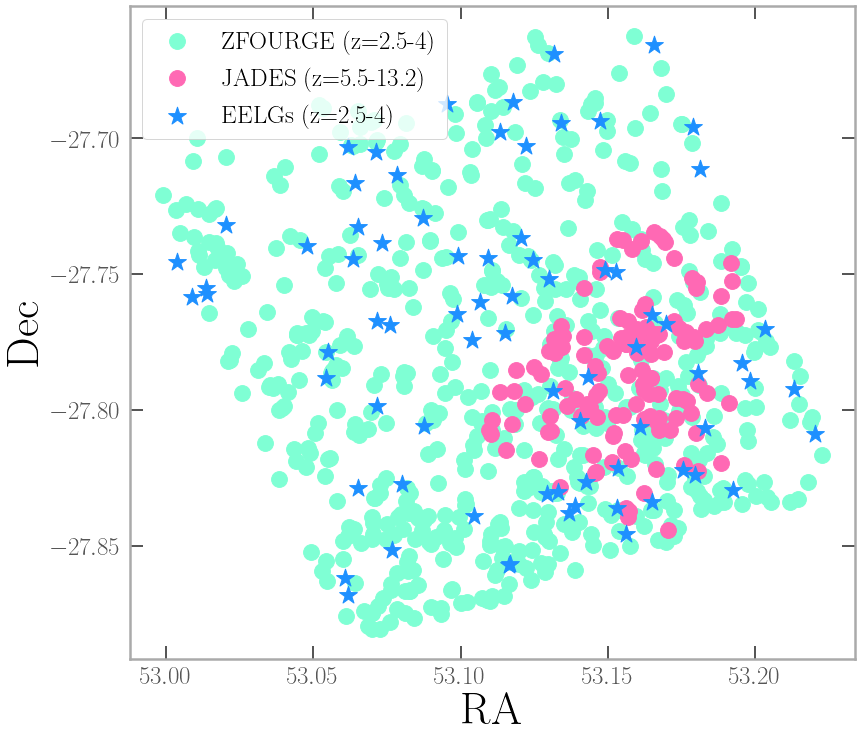

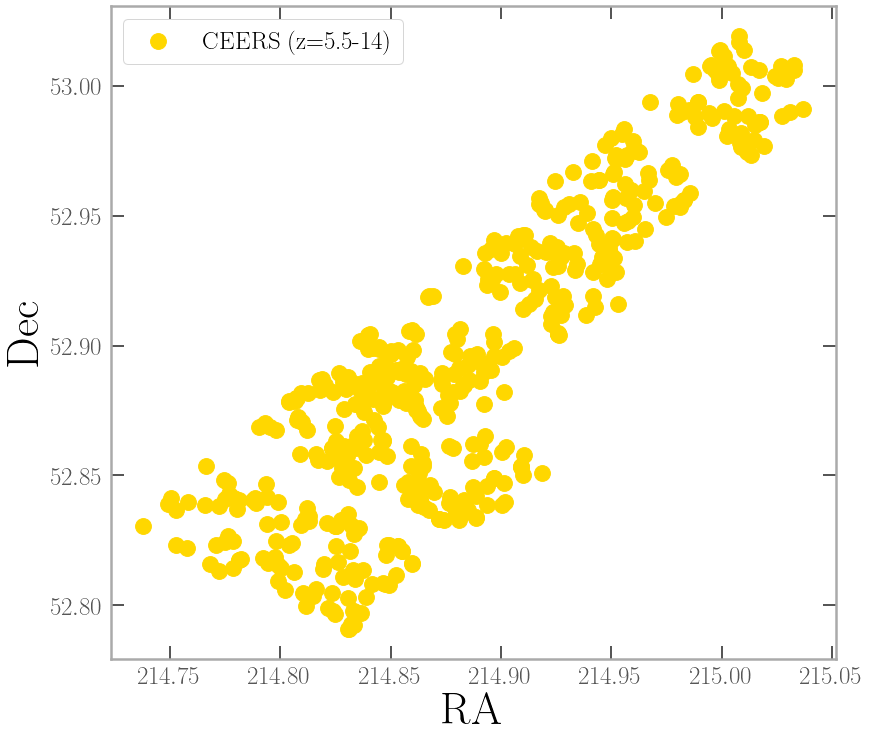

In [52]:
mpl.rcParams.update({'font.size': 22})
#B.where(B['Galaxy_ID'].isin(FELG['Galaxy_ID'])).dropna()['betaP']
# fig,ax=plt.subplots(figsize=(16,10))

# r'sSFR$_{0.1Gyr}$'
fig,ax=FancyPlot('RA','Dec')
ax.scatter(Anshu[~Anshu['id'].isin(eelgs['id_x'])]['ra'],Anshu[~Anshu['id'].isin(eelgs['id_x'])]['dec'], label='ZFOURGE (z=2.5-4)', s=250, c='aquamarine')
ax.scatter(specs['RA'],specs['DEC'],label='JADES (z=5.5-13.2)', s=250, c='hotpink')
ax.scatter(eelgs['ra'],eelgs['dec'], label='EELGs (z=2.5-4)', s=350,marker='*', c='dodgerblue')
plt.legend()
fig,ax=FancyPlot('RA','Dec')
ax.scatter(m['ra'],m['dec'],label='CEERS (z=5.5-14)', s=250, c='gold')
plt.legend()
 #ax.scatter(C['M(stars)'],C['sSFR'],label='CEERS (z=5.5-14)',s=250,c='gold')
# ax.scatter()
# fig.savefig('sSFRvsSM.png', format='png', dpi=600, bbox_inches='tight')

6019     53.069767
6234     53.072689
6328     53.068493
6464     53.076000
6524     53.084026
           ...    
30021    53.119160
30248    53.129868
30464    53.125198
30689    53.126308
30780    53.158829
Name: ra, Length: 606, dtype: float64


In [ ]:
Megatron = pd.DataFrame({'Name': pd.Series(dtype='str'),
                   '$\lambda_c$': pd.Series(dtype='float'),
                   'Filter_ID': pd.Series(dtype='int'),
                      'Fit?':pd.Series(dtype='int')})#Removed the unused filters and will sort them by wavelength below
d = {'Name': ['B','I','R','U','V','Z','Hs','Hl','J1','J2','J3','Ks','NB118','NB209','F098M','F105W','F125W',
              'F140W','F160W','F814W','IA484','IA527','IA574','IA598','IA624','IA651','IA679',
              'IA738','IA767','IA797','IA856','WFI_V','WFI_Rc','WFI_U38','tenisK','KsHI',
              'IRAC_36','IRAC_45','IRAC_58','IRAC_80'], 
     '$\lambda_c$': [0.4318,0.7693,0.6443,0.3749,0.5919,0.9036,1.5544,1.7020,
                 1.0540,1.1448,1.2802,2.1538,1.1909,2.0990,0.9867,1.0545,
                 1.2471,1.3924,1.5396,0.8057,0.4847,0.5259,0.5763,0.6007,0.6231,
                 0.6498,0.6782,0.7359,0.7680,0.7966,0.8565,0.5376,0.6494,
                 0.3686,2.1574,2.1748,3.5569,4.5020,5.7450,7.9158],
     'Filter ID':[214,216,364,363,215,217,438,439,434,435,436,440,572,573,365,366,328,
              329,330,126,267,269,270,568,271,569,272,
              274,275,570,571,251,252,249,279,368,
              153,154,155,156],
     'Fit?':[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]}
Megatron = pd.DataFrame(data=d)
Megatronsorted=Megatron.sort_values(by=['$\lambda_c$'])
Megatronsorted

In [ ]:
Megatron2 = pd.DataFrame({'Name': pd.Series(dtype='str'),
                   '$\lambda_c$': pd.Series(dtype='float'),
                   'Filter_ID': pd.Series(dtype='int'),
                      'Fit?':pd.Series(dtype='int')})
d = {'Name': ['B','I','R','U','V','Z','Hs','Hl','J1','J2','J3','Ks','NB118','NB209','F098M','F105W','F125W',
              'F140W','F160W','F814W','IA484','IA527','IA574','IA598','IA624','IA651','IA679',
              'IA738','IA767','IA797','IA856','WFI_V','WFI_Rc','WFI_U38','tenisK','KsHI',
              'IRAC_36','IRAC_45','IRAC_58','IRAC_80'], 
     '$\lambda_c$': [0.4318,0.7693,0.6443,0.3749,0.5919,0.9036,1.5544,1.7020,
                 1.0540,1.1448,1.2802,2.1538,1.1909,2.0990,0.9867,1.0545,
                 1.2471,1.3924,1.5396,0.8057,0.4847,0.5259,0.5763,0.6007,0.6231,
                 0.6498,0.6782,0.7359,0.7680,0.7966,0.8565,0.5376,0.6494,
                 0.3686,2.1574,2.1748,3.5569,4.5020,5.7450,7.9158],
     'Filter ID':[214,216,364,363,215,217,438,439,434,435,436,440,572,573,365,366,328,
              329,330,126,267,269,270,568,271,569,272,
              274,275,570,571,251,252,249,279,368,
              153,154,155,156],
     'Fit?':[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
    '$\lambda_{min}$':[3610.23,6803.72,5608.03,3329.00,4634.30,8007.01 ,14518.30,16021.22,9907.99 ,10600.65,12003.10,19559.84,11788.32,20808.45,8894.54 ,8955.24 ,10853.22,
                    11864.94,13857.70,6869.59,4670.62,5053.79,5546.10,5754.00,5984.95,6244.00,6513.59,
                    7117.77,7412.64,7682.00,8300.00,4830.19,5563.05,3285.42,19577.92,19369.71,31296.24,39173.28,48982.77,62993.78],
    '$\lambda_{max}$':[4883.77,8631.82,7230.82,4001.09,7180.10,10862.13,16536.50,18088.58,11209.51,12380.92,13779.45,23515.71,12030.15,21171.30,10848.64,12130.55,14141.73,
                    16133.14,17003.09,9632.01,5027.60,5475.93,5997.82,6265.00,6496.79,6774.00,7068.49,
                    7607.51,7942.87,8286.00,8840.00,5963.81,7654.51,3998.43,23431.05,23724.30,39614.36,50560.57,65088.94,95875.95],
    'AB mag':[22.097,22.151,27.321,25.932,22.968,21.378,26.618,26.588,26.270,26.558,26.521,26.851,24.668,24.786,25.670,
             26.259,26.229,26.421,25.942,25.931,25.463,25.639,25.543,25.962,25.887,26.072,26.105,26.003,26,25.986,25.713,
             23.999,24.597,21.587,24.13,31.419,20.054,20.075,20.626,21.803]}
Megatron2 = pd.DataFrame(data=d)
Megatronsorted2=Megatron2.sort_values(by=['$\lambda_c$'])
Megatronsorted2=Megatronsorted2.reset_index(drop=True)
Megatronsorted2.index +=1
Megatronsorted2

In [ ]:
# 3.49404*4959+4959
pd.set_option('display.max_columns', None)

In [ ]:
Sanity = Megatronsorted['Name']+'*'
WhyAreYou = Cabbage['redshift']
MyRemedy = Cabbage[Megatronsorted['Name']]
MyClarity = Cabbage[Sanity]

In [ ]:
HayleyWilliams =pd.DataFrame(data=Cabbage['id'])

for col in MyRemedy.columns:
    HayleyWilliams =HayleyWilliams.join(MyRemedy[col.replace('*','')])
    HayleyWilliams =HayleyWilliams.join(MyClarity[col+'*'])
    
HayleyWilliams.insert(1,'redshift',WhyAreYou)
HayleyWilliams

In [ ]:
for i in range(len(HayleyWilliams)):
    for j in range(1,41):
        if HayleyWilliams.iloc[i,j*2] < 0:
            HayleyWilliams.iloc[i,j*2+1] = -94
            HayleyWilliams.iloc[i,j*2] =-95
HayleyWilliams

In [ ]:
pd.set_option('display.max_columns', None)
HW1 = HayleyWilliams['redshift']>=2.5
HW2 = HayleyWilliams['redshift']<=4
HW = HayleyWilliams[HW1&HW2]
HW=HW.reset_index(drop=True)
HW

In [ ]:
# HW['IRAC_80']/HW['IRAC_80*']>25
0.000003*0.25<8.949918e-07

In [ ]:
HW3 = HayleyWilliams['redshift']>=4
HW4 = HayleyWilliams['redshift']<=5.3
HWJWST = HayleyWilliams[HW3&HW4]

print(len(HWJWST))
HWJWST

In [ ]:
#ZFourge tells me to use 25-2.5log_10(flux) to get the magnitude. Need to use this to convert to solar luminosity
#per Hz. The units of magnitude are in   3.631×10−30erg s−1 Hz−1 cm−2 so these must be the units of the flux too. 
# HayleyWilliams.to_csv('Montague_zspec_snr20.csv',index=False)
# HW.to_csv('Forrest.csv',index=False)
# HayleyWilliams.to_csv('Forrest-Hayley.csv',index=False)

In [ ]:
HW2=HW
Maroon5=HW2

In [ ]:
redshift = Maroon5['redshift']
O2_1 = 3726
O2_2 = 3729
H_beta=4861
H_alpha=6563
O3_1=4959
O3_2=5007
obsO2_1 = redshift*O2_1 + O2_1
obsO2_2 = redshift*O2_2 + O2_2
obsH_beta = redshift*H_beta + H_beta
obsH_alpha = redshift*H_alpha +H_alpha
obsO3_1 = redshift*O3_1 +O3_1
obsO3_2 = redshift*O3_2 +O3_2

In [ ]:
# print(obs[:20])
# for i in range(20):
#     if obsH_beta[i]>Megatronsorted2['$\lambda_{min}$'].loc[30] and obsH_beta[i]<Megatronsorted2['$\lambda_{max}$'].loc[30]:
#         print('yikes')
#     else:
#         print('notyikes')
# Maroon5

In [ ]:
# Maroon5.to_csv('Maroon6-FORREST.csv')

In [ ]:
# path2 = os.path.expanduser('~/notebook/Test folder/')
# BadID = Table.read(os.path.expanduser(path2+'Bad-IDs.csv'), format = 'ascii')
# BadID=BadID.to_pandas().drop(['col1'],axis=1)
# BadID.columns = BadID.iloc[0]
# BadID = BadID[1:]
# BadID.index -=1
# BadID2 = BadID
# BadID

In [ ]:
# np.append(BadID2['Galaxy_ID'],BadID['Galaxy_ID'])
# x=pd.concat([BadID2,BadID],axis=1)
# x.columns = ['new_col1', 'new_col2']
# x[x['new_col1']!=x['new_col2']]

In [ ]:
# BadID['Galaxy_ID']=BadID['Galaxy_ID'].astype(int)
# BadID

In [ ]:
# BadForrest=pd.merge(left=BadID['Galaxy_ID'],right=HW,left_on='Galaxy_ID',right_on='id')
# BadForrest=BadForrest.drop(['Galaxy_ID'],axis=1)
# BadForrest

In [ ]:
# Bad

In [ ]:
# BadForrest.to_csv('Bad-Forrest-obs.csv',index=False)

In [ ]:
Exp = HW

In [ ]:
for i in range(len(Exp)):
    if Exp['IRAC_36*'].loc[i]<0.25*Exp['IRAC_36'].loc[i]:
        Exp['IRAC_36*'].loc[i]=0.25*Exp['IRAC_36'].loc[i]
    if Exp['IRAC_45*'].loc[i]<0.25*Exp['IRAC_45'].loc[i]:
        Exp['IRAC_45*'].loc[i]=0.25*Exp['IRAC_45'].loc[i]
    if Exp['IRAC_58*'].loc[i]<0.25*Exp['IRAC_58'].loc[i]:
        Exp['IRAC_58*'].loc[i]=0.25*Exp['IRAC_58'].loc[i]
    if Exp['IRAC_80*'].loc[i]<0.25*Exp['IRAC_80'].loc[i]:
        Exp['IRAC_80*'].loc[i]=0.25*Exp['IRAC_80'].loc[i]
Exp

In [ ]:
# Exp.to_csv('TommyMatch.csv', index=False)
# Exp['IRAC_80']/Exp['IRAC_80*']>20
Exp['IRAC_80'].iloc[4]/Exp['IRAC_80*'].iloc[4]

In [ ]:
Exp.iloc[0,4+1]

In [ ]:
# HW[HW['id']==8024]
for i in range(len(Exp)):
    for j in range(1,41):
        if Exp.iloc[i,j*2]/Exp.iloc[i,j*2+1] <20:
            Exp.iloc[i,j*2] = -80
            Exp.iloc[i,j*2+1] = -82
Exp
        

In [ ]:
# Exp.to_csv('Badfloor25.csv',index=False)
# Exp.to_csv('FINAL.csv', index=False)
Exp.to_csv('noSN20.csv',index=False)

In [ ]:
# GoodForrest = pd.merge(left=BadID['Galaxy_ID'],right=HW,left_on='Galaxy_ID',right_on='id',how='outer')
# GoodForrest=GoodForrest[GoodForrest['Galaxy_ID'].isna()]
# GoodForrest=GoodForrest.drop(['Galaxy_ID'],axis=1)
# GoodForrest

In [ ]:
# Bad2.head(20)
# GoodForrest.to_csv('Good-Forrest.csv',index=False)

In [ ]:
# Good=abs(GoodForrest['IRAC_80*']/GoodForrest['IRAC_80'])
# Bad=abs(BadForrest['IRAC_80*']/BadForrest['IRAC_80'])
# Good2=abs(GoodForrest['IRAC_58*']/GoodForrest['IRAC_58'])
# Bad2=abs(BadForrest['IRAC_58*']/BadForrest['IRAC_58'])
# Good3=abs(GoodForrest['IRAC_45*']/GoodForrest['IRAC_45'])
# Bad3=abs(BadForrest['IRAC_45*']/BadForrest['IRAC_45'])
# Good4=abs(GoodForrest['IRAC_36*']/GoodForrest['IRAC_36'])
# Bad4=abs(BadForrest['IRAC_36*']/BadForrest['IRAC_36'])
# import numpy as np
# def reject_outliers(data, m = 30.):
#     d = np.abs(data - np.median(data))
#     mdev = np.median(d)
#     s = d/mdev if mdev else 0.
#     return data[s<m]

# plt.figure(figsize=(12,10))
# # plt.hist([reject_outliers(Good),reject_outliers(Bad),reject_outliers(Good2),reject_outliers(Bad2),
# #          reject_outliers(Good3),reject_outliers(Bad3),reject_outliers(Good4),reject_outliers(Bad4)],
# #          bins=linspace(0,max(reject_outliers(Good)),10),
# #          label=['Good80','Bad80','Good58','Bad58','Good45','Bad45','Good36','Bad36'],align='mid',density=True)
# # # plt.hist([reject_outliers(Good4),reject_outliers(Bad4)],label=['Good','Bad'],density=True,align='mid')
# # plt.hist([Bad],label='Bad',density=True,align='mid')
# plt.xlim(0,max(reject_outliers(Good)))
# plt.ylabel('Area Normalized Counts')
# plt.xlabel('irac-er/irac-flux')
# # plt.title('IRAC_36')
# plt.legend()

# plt.figure(figsize=(12,10))
# plt.scatter(Good,Good2,label='good')
# plt.scatter(Bad,Bad2,label='bad')
# plt.xlabel('irac80')
# plt.ylabel('irac58')
# plt.legend()

In [ ]:
# plt.figure(figsize=(12,10))

# plt.hist([reject_outliers(Good),reject_outliers(Good2),
#          reject_outliers(Good3),reject_outliers(Good4)],
#          bins=linspace(0,max(reject_outliers(Good)),10),
#          label=['Good80','Good58','Good45','Good36'],align='mid',density=True,alpha=0.9)
# plt.hist([reject_outliers(Bad),reject_outliers(Bad2),
#          reject_outliers(Bad3),reject_outliers(Bad4)],
#          bins=linspace(0,max(reject_outliers(Good)),10),
#          label=['Bad80','Bad58','Bad45','Bad36'],align='mid',density=True,alpha=0.5)
# plt.xlim(0,max(reject_outliers(Good)))
# plt.ylabel('Area Normalized Counts')
# plt.xlabel('irac-er/irac-flux')
# # plt.title('IRAC_36')
# plt.legend()

In [ ]:
# Good3[Good3<0.1]
# median(Bad)

In [ ]:
# median(Bad2)

In [ ]:
# median(Bad3)poo

In [ ]:
Exp[Exp['id']==8024]

In [ ]:
Maroon5=Exp

In [ ]:
for i in range(len(Maroon5)):
    for j in range(1,41):
#         if obsO2_1[i]>Megatronsorted2['$\lambda_{min}$'].iloc[j-1] and obsO2_1[i]<Megatronsorted2['$\lambda_{max}$'].iloc[j-1]:
#             Maroon5.iloc[i,2*j]=-101
#             Maroon5.iloc[i,2*(j)+1]=-110
#         elif obsO2_2[i]>Megatronsorted2['$\lambda_{min}$'].iloc[j-1] and obsO2_2[i]<Megatronsorted2['$\lambda_{max}$'].iloc[j-1]:
#             Maroon5.iloc[i,2*j]=-102
#             Maroon5.iloc[i,2*(j)+1]=-110
#         elif obsH_beta[i]>Megatronsorted2['$\lambda_{min}$'].iloc[j-1] and obsH_beta[i]<Megatronsorted2['$\lambda_{max}$'].iloc[j-1]:
#             Maroon5.iloc[i,2*j]=-103
#             Maroon5.iloc[i,2*(j)+1]=-110
#         elif obsH_alpha[i]>Megatronsorted2['$\lambda_{min}$'].iloc[j-1] and obsH_alpha[i]<Megatronsorted2['$\lambda_{max}$'].iloc[j-1]:
#             Maroon5.iloc[i,2*j]=-104
#             Maroon5.iloc[i,2*(j)+1]=-110
        if obsO3_1[i]>Megatronsorted2['$\lambda_{min}$'].iloc[j-1] and obsO3_1[i]<Megatronsorted2['$\lambda_{max}$'].iloc[j-1]:
            Maroon5.iloc[i,2*(j)]=-105
            Maroon5.iloc[i,2*(j)+1]=-110
#         elif obsO3_2[i]>Megatronsorted2['$\lambda_{min}$'].iloc[j-1] and obsO3_2[i]<Megatronsorted2['$\lambda_{max}$'].iloc[j-1]:
#             Maroon5.iloc[i,2*j]=-106
#             Maroon5.iloc[i,2*(j)+1]=-110
Maroon5

In [ ]:
# Maroon5.to_csv('FINALM.csv', index=False)
Maroon5.to_csv('noSN20M.csv',index=False)


In [ ]:
# HW[HW['IRAC_80*'] == -23.75]
Exp

In [ ]:
#ProSpect
# Taylor = Exp

In [ ]:
# for i in range(len(Taylor)):
#     for j in range(1,82):
#         if Taylor.iloc[i,j] < 0:
#             Taylor.iloc[i,j] = nan
# Taylor

In [ ]:
# Taylor.to_csv('ProSpect-Final_Sample.csv',index=False)

In [ ]:
# BadIDM5 = Table.read(os.path.expanduser(path2+'Bad-IDs-M5.csv'), format = 'ascii')
# BadIDM5=BadIDM5.to_pandas().drop(['col1'],axis=1)
# BadIDM5.columns = BadIDM5.iloc[0]
# BadIDM5 = BadIDM5[1:]
# BadIDM5.index -=1

In [ ]:
# BadIDM5['Galaxy_ID']=BadIDM5['Galaxy_ID'].astype(int)
# BadIDM5

In [ ]:
# BadForrestM5=pd.merge(left=BadIDM5['Galaxy_ID'],right=Taylor,left_on='Galaxy_ID',right_on='id')
# BadForrestM5=BadForrestM5.drop(['Galaxy_ID'],axis=1)
# BadForrestM5

In [ ]:
# GoodForrestM5 = pd.merge(left=BadIDM5['Galaxy_ID'],right=Taylor,left_on='Galaxy_ID',right_on='id',how='outer')
# GoodForrestM5=GoodForrestM5[GoodForrestM5['Galaxy_ID'].isna()]
# GoodForrestM5=GoodForrestM5.drop(['Galaxy_ID'],axis=1)
# GoodForrestM5

In [ ]:
# GoodM5=abs(GoodForrestM5['IRAC_80*']/GoodForrestM5['IRAC_80'])
# BadM5=abs(BadForrestM5['IRAC_80*']/BadForrestM5['IRAC_80'])
# GoodM52=abs(GoodForrestM5['IRAC_58*']/GoodForrestM5['IRAC_58'])
# BadM52=abs(BadForrestM5['IRAC_58*']/BadForrestM5['IRAC_58'])
# GoodM53=abs(GoodForrestM5['IRAC_45*']/GoodForrestM5['IRAC_45'])
# BadM53=abs(BadForrestM5['IRAC_45*']/BadForrestM5['IRAC_45'])
# GoodM54=abs(GoodForrestM5['IRAC_36*']/GoodForrestM5['IRAC_36'])
# BadM54=abs(BadForrestM5['IRAC_36*']/BadForrestM5['IRAC_36'])
# plt.figure(figsize=(12,10))
# plt.hist([reject_outliers(GoodM5),reject_outliers(BadM5),reject_outliers(GoodM52),reject_outliers(BadM52),
#          reject_outliers(GoodM53),reject_outliers(BadM53),reject_outliers(GoodM54),reject_outliers(BadM54)],
#          bins=linspace(0,max(reject_outliers(GoodM5)),10),
#          label=['Good80','Bad80','Good58','Bad58','Good45','Bad45','Good36','Bad36'],align='mid',density=True)
# # plt.hist([Good],label='Good',density=True,align='mid')
# # plt.hist([Bad],label='Bad',density=True,align='mid')
# plt.xlim(0,max(reject_outliers(GoodM5)))
# plt.ylabel('Area Normalized Counts No O3')
# plt.xlabel('irac-er/irac-flux')
# plt.legend()

In [ ]:
# comp_ew = Table.read(os.path.expanduser(path+'/EELG-stuff/comp_ew.dat'), format ='ascii')
# xy = comp_ew.to_pandas()
# pd.set_option('display.max_rows', 20)
# # xy
# xyz = xy[xy['col1']<100000]
# stuff = xyz.drop(['col3','col4'],axis=1)
# stuff.rename(columns={'col1':'id' ,'col2':'redshift'} ,inplace=True)
# # stuff


In [ ]:
# mask3 = HayleyWilliams['redshift']>3
# mask36 = HayleyWilliams['redshift']<3.6
# Monster=HayleyWilliams[mask3&mask36]
# plt.figure(figsize=(10,10))
# # plt.xlim(-0.0001,0.0001)
# # plt.ylim(-0.0001,0.0001)
# plt.legend()
# plt.xlabel('KsHI-IRAC36')
# plt.ylabel('Hl-KsHI')
# plt.title('K redshift 3-3.6')
# plt.scatter((25-2.5*log10(Monster['KsHI'].mul(10**6)))-(25-2.5*log10(Monster['IRAC_36'].mul(10**6)))
#             , (25-2.5*log10(Monster['Hl'].mul(10**6)))-(25-2.5*log10(Monster['KsHI'].mul(10**6))),c='black',marker='o')

In [ ]:
# Montague.to_csv('Montague.csv', index=False)
# Megatronsorted.to_csv('Megatron.csv', index=False) #Just renamed so I could do the O3 test easily. same shit
#From here just download the csv file and rename it to .dat

In [ ]:
# sadsad=Table.read(os.path.expanduser('~/NB118.dat'),format='ascii')
# sadsad2=sadsad.to_pandas()
# sadsad2.to_csv('NB118.csv',index=False)
# sadsadsad=Table.read(os.path.expanduser('~/NB209.dat'),format='ascii')
# sadsadsad2=sadsadsad.to_pandas()
# sadsadsad2.to_csv('NB209.csv',index=False)

In [ ]:
# NBfix = Table.read(os.path.expanduser('~/ProSpect_Filters/NB118.csv'), format ='ascii')
# NBfix['wave']=NBfix['wave']*10
# NBfix = NBfix.to_pandas()
# NBfix.to_csv('NB1182.csv',index=False)
# NBfix2 = Table.read(os.path.expanduser('~/ProSpect_Filters/NB209.csv'), format ='ascii')
# NBfix2['wave']=NBfix2['wave']*10
# NBfix2 = NBfix2.to_pandas()
# NBfix2.to_csv('NB2092.csv',index=False)